In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display # must be explicitly imported
import IPython.display as ipd  # for playing .wav files in nb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")
warnings.filterwarnings("ignore", message="lbfgs failed to converge ")

In [3]:
# Load dataframe
df_full = pd.read_pickle("df_plus_mfcc20_nomean.pkl") # pickled 2021-10-22

# Rename classes for clarity
df_full.loc[df_full['label'] == 'we', 'label'] = 'Welsh'
df_full.loc[df_full['label'] == 'mi', 'label'] = 'Midlands'
df_full.loc[df_full['label'] == 'no', 'label'] = 'Northern'
df_full.loc[df_full['label'] == 'sc', 'label'] = 'Scottish'
df_full.loc[df_full['label'] == 'so', 'label'] = 'Southern'

# Prepare class list (in alphabetical order)
labels = ['Midlands', 'Northern', 'Scottish', 'Southern', 'Welsh']

# Prepare feature lists
colnames_mfcc20 = []  # for 20 MFCCs

for n in range(20):
    num = n+1
    if num < 10:
        num = '0' + str(num)
    else:
        num = str(num)
    name = 'mfcc_' + num
    colnames_mfcc20.append(name)

colnames_mfcc20_del = [(name + '_del') for name in colnames_mfcc20]  # includes MFCC-deltas
colnames_mfcc20_del2 = [(name + '_del2') for name in colnames_mfcc20] # includes MFCC-deltas and MFCC-delta-deltas

              precision    recall  f1-score   support

    Midlands       0.82      0.81      0.82       143
    Northern       0.78      0.90      0.84       606
    Scottish       0.88      0.82      0.84       525
    Southern       0.92      0.93      0.92      1646
       Welsh       0.97      0.84      0.90       566

    accuracy                           0.89      3486
   macro avg       0.87      0.86      0.86      3486
weighted avg       0.89      0.89      0.89      3486



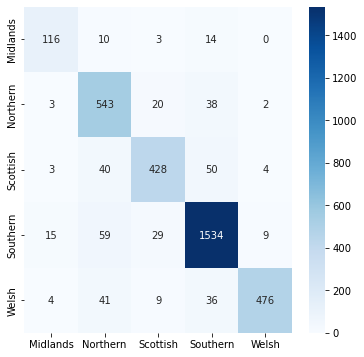

In [4]:
def check_model(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split( \
        X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check predictions
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
                fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
    print(classification_report(y_test, y_pred, target_names=labels))
    
    return None

# Example:
knn10 = KNeighborsClassifier(n_neighbors=10)
check_model(knn10, df_full[colnames_mfcc20], df_full['label'])

### 1. MFCCs only (baseline)

              precision    recall  f1-score   support

    Midlands       0.82      0.81      0.82       143
    Northern       0.78      0.90      0.84       606
    Scottish       0.88      0.82      0.84       525
    Southern       0.92      0.93      0.92      1646
       Welsh       0.97      0.84      0.90       566

    accuracy                           0.89      3486
   macro avg       0.87      0.86      0.86      3486
weighted avg       0.89      0.89      0.89      3486



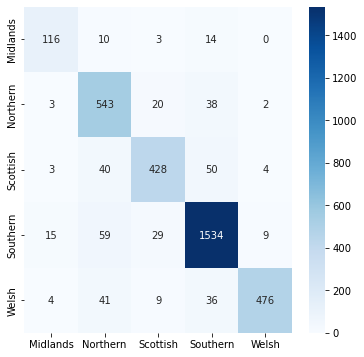

In [5]:
# K nearest neighbors model (k=10)

knn10 = KNeighborsClassifier(n_neighbors=10)

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20], df_full['label'], test_size=0.2, random_state=42)

knn10.fit(X_train, y_train)
y_pred = knn10.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Midlands       0.89      0.24      0.38       143
    Northern       0.46      0.34      0.39       606
    Scottish       0.51      0.25      0.33       525
    Southern       0.64      0.85      0.73      1646
       Welsh       0.71      0.71      0.71       566

    accuracy                           0.62      3486
   macro avg       0.64      0.48      0.51      3486
weighted avg       0.61      0.62      0.59      3486



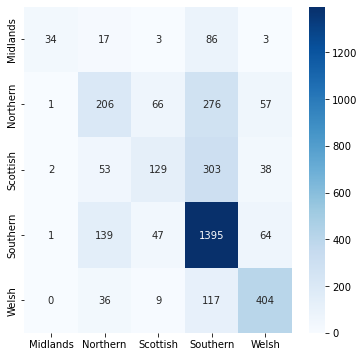

In [6]:
# Logistic model (multinomial)

logit = LogisticRegression(solver='lbfgs',
                          multi_class='multinomial')

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20], df_full['label'], test_size=0.2, random_state=42)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Midlands       0.66      0.66      0.66       143
    Northern       0.71      0.72      0.72       606
    Scottish       0.70      0.69      0.70       525
    Southern       0.84      0.85      0.84      1646
       Welsh       0.77      0.75      0.76       566

    accuracy                           0.78      3486
   macro avg       0.74      0.74      0.74      3486
weighted avg       0.78      0.78      0.78      3486



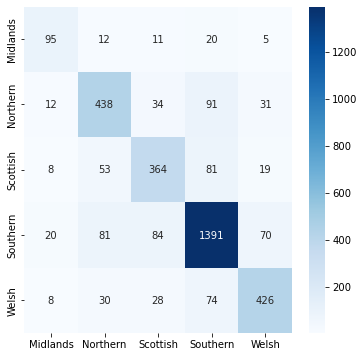

In [12]:
# Decision tree

dt = DecisionTreeClassifier(max_depth=16)

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20], df_full['label'], test_size=0.2, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Midlands       1.00      0.85      0.92       143
    Northern       0.95      0.94      0.94       606
    Scottish       0.99      0.86      0.92       525
    Southern       0.93      0.99      0.96      1646
       Welsh       0.98      0.93      0.96       566

    accuracy                           0.95      3486
   macro avg       0.97      0.92      0.94      3486
weighted avg       0.95      0.95      0.95      3486



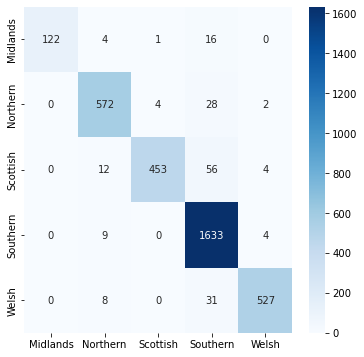

In [13]:
# Random forests

rf100 = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20], df_full['label'], test_size=0.2, random_state=42)

rf100.fit(X_train, y_train)
y_pred = rf100.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

### 2. MFCCs + MFCC-Δs

In [ ]:
# K nearest neighbors model (k=10)

knn10 = KNeighborsClassifier(n_neighbors=10)

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20+
           colnames_mfcc20_del], df_full['label'], test_size=0.2, random_state=42)

knn10.fit(X_train, y_train)
y_pred = knn10.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
# Logistic model (multinomial)

logit = LogisticRegression(solver='lbfgs',
                          multi_class='multinomial')

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20+
           colnames_mfcc20_del], df_full['label'], test_size=0.2, random_state=42)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
# Decision tree

dt = DecisionTreeClassifier(max_depth=16)

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20+
           colnames_mfcc20_del], df_full['label'], test_size=0.2, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
# Random forests

rf100 = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20+
           colnames_mfcc20_del], df_full['label'], test_size=0.2, random_state=42)

rf100.fit(X_train, y_train)
y_pred = rf100.predict(X_test)

# Check predictions
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', \
            fmt='g', xticklabels=labels, yticklabels=labels, ax=ax)
print(classification_report(y_test, y_pred, target_names=labels))

### 3. MFCCs + MFCC-Δs + MFCC-Δ^2s

In [ ]:
# Logistic model (multinomial)

logit = LogisticRegression(solver='lbfgs',
                          multi_class='multinomial')

X_train, X_test, y_train, y_test = train_test_split( \
    df_full[colnames_mfcc20+
            colnames_mfcc20_del+
            colnames_mfcc20_del2], df_full['label'], test_size=0.2, random_state=42)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

# Check predictions
sns.heatmap(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
# For checking single rows

# X_test.iloc[1, :]
# print(logit.predict(np.array(X_test.iloc[1, :]).reshape(1, -1))) #id 19